<a href="https://colab.research.google.com/github/lee00206/Tensorflow_for_beginners/blob/main/Fashion_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Imports**

In [53]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## **Dataset**
In this notebook, the MNIST Fashion Dataset will be used.<br>
This dataset includes 60,000 images for training and 10,000 images for validation/testing.

In [54]:
# load dataset
fashion_mnist = keras.datasets.fashion_mnist

# split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [55]:
train_images.shape  # 60,000 images that are made up of 28x28 pixels

(60000, 28, 28)

In [56]:
# have a look at one pixel
# pixel values are between 0 and 255, 0 being black and 255 being white.
train_images[0, 23, 23]

194

In [57]:
# the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

The labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. 

In [58]:
# Create an array of label names to indicate which is which
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

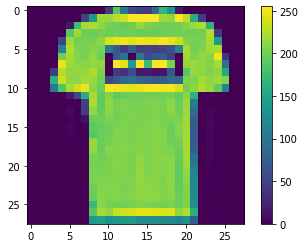

In [59]:
# Example of these images
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

## **Data Preprocessing**
Applying some prior transformations to the data before feeding it the model. In this case, all of the greyscale pixel values (0-255) will be scaled between 0 and 1. It can be done by dividing each value in the training and testing sets by 255. The reason for doing this process is because smaller values will make it easier for the model to process the values (when reducing weight and bias to minimize the loss function).

In [60]:
train_images = train_images / 255
test_images = test_images / 255

## **Building the Model**

In [61]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),   # input layer (1)
                          keras.layers.Dense(128, activation = 'relu'),   # hidden layer (2)
                          keras.layers.Dense(10, activation = 'softmax')  # output layer (3) -> 10 classes
])

**Layer 1**: input layer consists of 784 neurons. The flatten means that the layer will reshape the shape (28, 28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.<br>
**Layer 2**: The *dense* denotes that this layer(hidden layer) will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.<br>
**Layer 3**: Output/dense layer. It has 10 neurons to determine the models output. Each neuron represents the probability of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate the probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.

## **Compile the Model**
Define the loss function, optimizer and metrics that will be tracked.

In [62]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

## **Training the Model**

In [63]:
model.fit(train_images, train_labels, epochs = 10)  # fit the model to the training data

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6307 - accuracy: 0.7815
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3845 - accuracy: 0.8593
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3175 - accuracy: 0.8830
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2629 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2522 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2462 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

## **Evaluating the Model**
The *verbose* argument is defined from the keras documentation as: "verbose 0 or 1. Verbosity mode 0 = silent, 1 = progress bar"

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8801
Test accuracy: 0.8801000118255615


The accuracy of the model of the training data is higher than that of the testing data, which means "overfitting" has happened. To solve this problem, try to change the hyperparameters (optimizer, loss, epochs, etc.)

## **Making Predictions**

Ankle boot


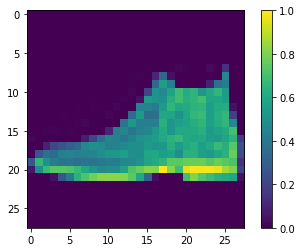

In [65]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])   # predictions of the image of 0
                                   # np.argmax: returns the maximum value of the list

# plot the image
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## **Verifying Predictions**

Pick a number: 45


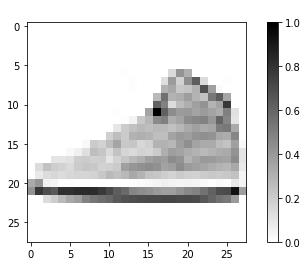

Expected:  Sneaker
Guess:  Sneaker


In [81]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Expected: ", label)
  print("Guess: ", guess)

def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)